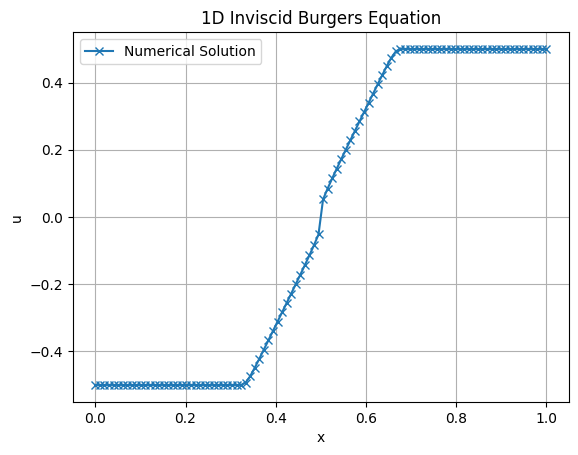

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Flux function
def flux(u):
    return 0.5 * u**2

# Riemann solver (Godunov flux for Burgers' equation)
def godunov_flux(uL, uR):
    if uL > uR:
        # Shock
        u = ...
        return flux(u)
    else:
        # Rarefaction
        u = ...
        return flux(u)

# Initial condition: step function
def initial_condition(x, uL, uR):
    return np.where(x < 0.5, uL, uR)

# Finite volume solver
def burgers_fvm(uL, uR, N=100, CFL=0.9, T=0.3):
    x = np.linspace(0, 1, N)
    dx = x[1] - x[0]
    u = initial_condition(x, uL, uR)

    t = 0.0
    while t < T:
        # Compute max speed for CFL condition
        max_speed = np.max(np.abs(u))
        dt = CFL * dx / max_speed 
        if t + dt > T:
            dt = T - t

        # Compute numerical fluxes
        fluxes = np.zeros(N+1)
        for i in range(1, N):
            fluxes[i] = godunov_flux(u[i-1], u[i])

        # Update solution
        u[1:-1] -= dt/dx * (fluxes[2:-1] - fluxes[1:-2])

        t += dt

    return x, u

# Run and plot
x, u = burgers_fvm( -0.5, 0.5, N=100)
plt.plot(x, u, 'x-', label='Numerical Solution')
plt.xlabel('x')
plt.ylabel('u')
plt.title('1D Inviscid Burgers Equation')
plt.grid()
plt.legend()
plt.show()
